# Task 1: Data Preprocessing
In this section, we will load the dataset, clean it by handling missing values and inconsistencies, and perform feature engineering to prepare it for analysis and modeling.

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [34]:
# Load the dataset
data = pd.read_csv('/content/online_advertising_performance_data.csv')

In [35]:
# Step 1: Handle missing values and drop irrelevant columns
data = data.drop(columns=['Unnamed: 12', 'Unnamed: 13'])  # Drop empty columns

In [36]:
# Impute missing 'placement' with the most frequent value
most_frequent_placement = data['placement'].mode()[0]
data['placement'].fillna(most_frequent_placement, inplace=True)

<ipython-input-36-2da213b946e5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['placement'].fillna(most_frequent_placement, inplace=True)


In [37]:
# Verify missing values
print("\nMissing Values After Cleaning:")
print(data.isnull().sum())


Missing Values After Cleaning:
month                      0
day                        0
campaign_number            0
user_engagement            0
banner                     0
placement                  0
displays                   0
cost                       0
clicks                     0
revenue                    0
post_click_conversions     0
post_click_sales_amount    0
dtype: int64


In [38]:
# Step 2: Feature Engineering
data['CPC'] = data['cost'] / data['clicks'].replace(0, np.nan)
data['CTR'] = (data['clicks'] / data['displays'].replace(0, np.nan)) * 100
data['Conversion_Rate'] = (data['post_click_conversions'] / data['clicks'].replace(0, np.nan)) * 100
data['Date'] = pd.to_datetime(data['month'] + ' ' + data['day'].astype(str) + ' 2020', format='%B %d %Y')

In [39]:
# Step 3: Encode categorical variables
le = LabelEncoder()
data['campaign_number'] = le.fit_transform(data['campaign_number'])
data['user_engagement'] = le.fit_transform(data['user_engagement'])
data['banner'] = le.fit_transform(data['banner'])
data['placement'] = le.fit_transform(data['placement'])

In [40]:
# Step 4: Feature Selection
data = data.drop(columns=['month', 'day'])

In [41]:
# Display preprocessed data
print("\nPreprocessed Data Preview:")
print(data.head())


Preprocessed Data Preview:
   campaign_number  user_engagement  banner  placement  displays      cost  \
0                0                0       0          0         4    0.0060   
1                0                0       0          1     20170   26.7824   
2                0                0       0          2     14701   27.6304   
3                0                0       0          4    171259  216.8750   
4                0                1       0          1       552    0.0670   

   clicks   revenue  post_click_conversions  post_click_sales_amount  \
0       0    0.0000                       0                   0.0000   
1     158   28.9717                      23                1972.4602   
2     158   28.9771                      78                2497.2636   
3    1796  329.4518                     617               24625.3234   
4       1    0.1834                       0                   0.0000   

        CPC       CTR  Conversion_Rate       Date  
0       NaN  0.000

In [42]:
# Save preprocessed data
data.to_csv('/content/preprocessed_advertising_data.csv', index=False)
print("Preprocessed data saved as 'preprocessed_advertising_data.csv'")

Preprocessed data saved as 'preprocessed_advertising_data.csv'


# Task 2: Exploratory Data Analysis (EDA)
We will explore the dataset to identify patterns, trends, and relationships that can provide actionable insights for optimizing marketing spend.

In [43]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Load preprocessed data (if restarting notebook)
data = pd.read_csv('/content/preprocessed_advertising_data.csv')

In [45]:
# Summary statistics
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
       campaign_number  user_engagement        banner     placement  \
count     15408.000000     15408.000000  15408.000000  15408.000000   
mean          1.002596         1.039265      3.200350      2.445093   
std           0.946203         0.819587      2.164497      1.311921   
min           0.000000         0.000000      0.000000      0.000000   
25%           0.000000         0.000000      1.000000      1.000000   
50%           1.000000         1.000000      3.000000      2.000000   
75%           2.000000         2.000000      5.000000      4.000000   
max           2.000000         2.000000      7.000000      4.000000   

            displays          cost        clicks       revenue  \
count   15408.000000  15408.000000  15408.000000  15408.000000   
mean    15512.573014     11.370262    161.788487     17.929943   
std     44392.392890     45.369499    728.276911     96.781834   
min         0.000000      0.000000      0.000000      0.000000   
25%       

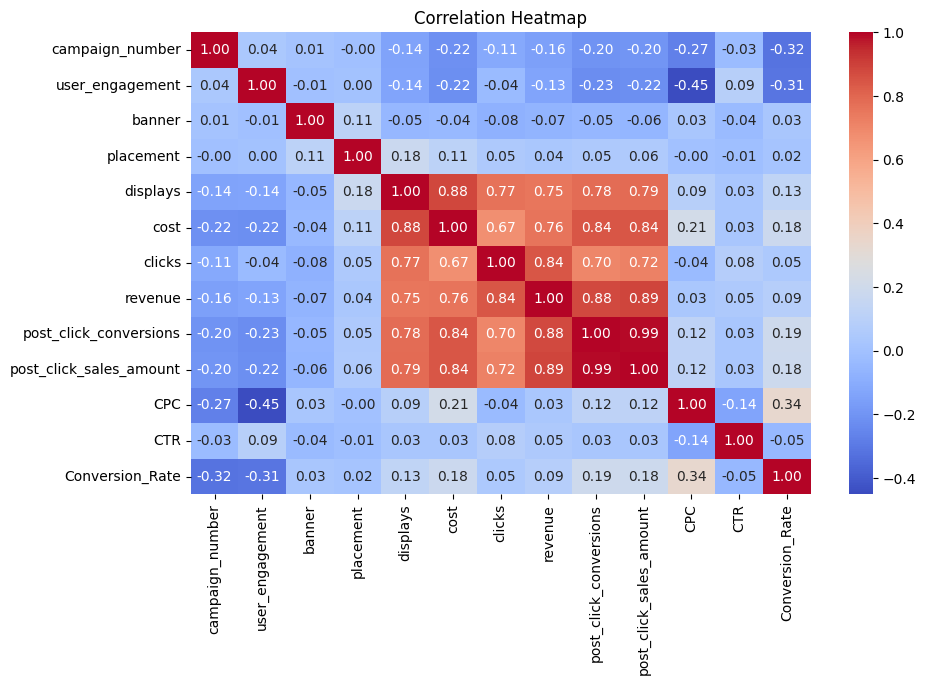

In [49]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
# Exclude the 'Date' column from correlation calculation
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [50]:
# Campaign-wise performance
campaign_performance = data.groupby('campaign_number').agg({
    'displays': 'sum',
    'cost': 'sum',
    'clicks': 'sum',
    'revenue': 'sum',
    'post_click_conversions': 'sum',
    'post_click_sales_amount': 'sum'
}).reset_index()

print("\nCampaign Performance:")
print(campaign_performance)


Campaign Performance:
   campaign_number   displays         cost   clicks      revenue  \
0                0  143311319  150688.5798  1409136  230535.3563   
1                1   45492269   17037.3496   881158   34890.4153   
2                2   50214137    7467.0663   202543   10838.7905   

   post_click_conversions  post_click_sales_amount  
0                  633085             3.101275e+07  
1                   13767             1.167509e+06  
2                    4916             5.353672e+05  


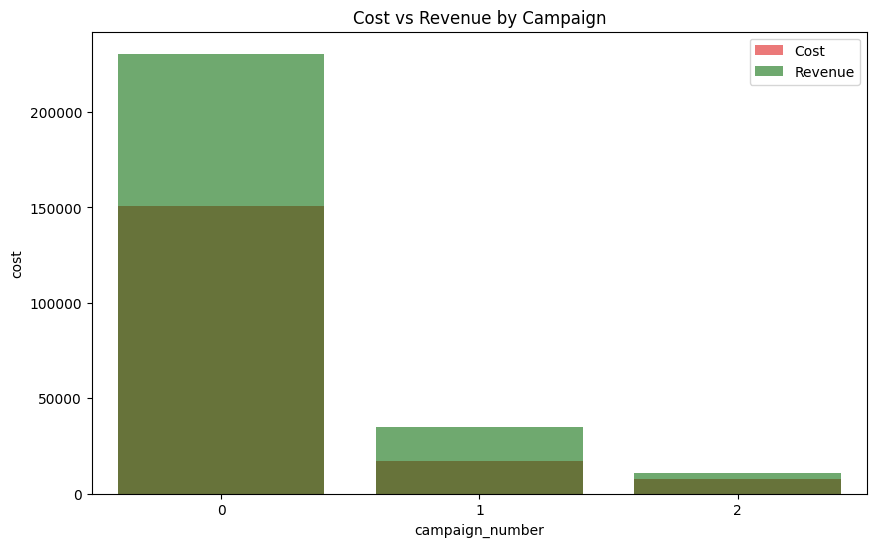

In [51]:
# Plot campaign-wise cost vs revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='campaign_number', y='cost', data=campaign_performance, color='red', alpha=0.6, label='Cost')
sns.barplot(x='campaign_number', y='revenue', data=campaign_performance, color='green', alpha=0.6, label='Revenue')
plt.title("Cost vs Revenue by Campaign")
plt.legend()
plt.show()

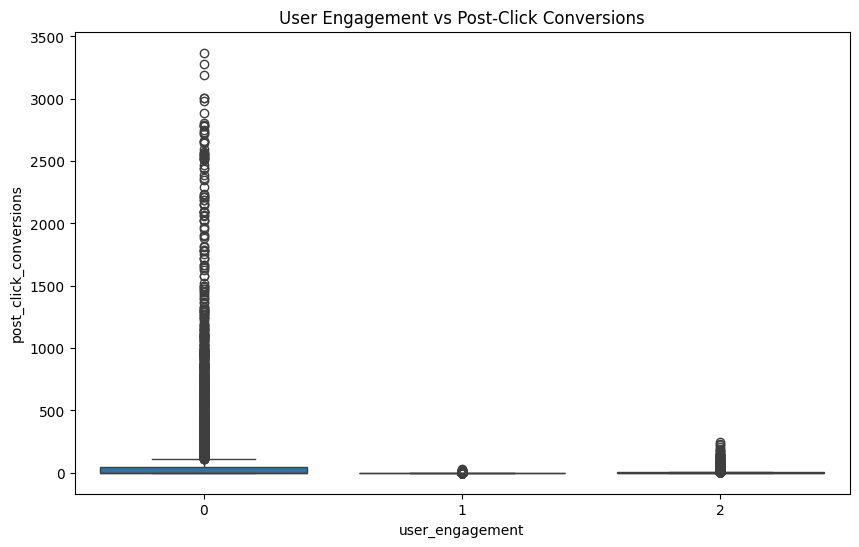

In [52]:
# User engagement vs conversions
plt.figure(figsize=(10, 6))
sns.boxplot(x='user_engagement', y='post_click_conversions', data=data)
plt.title("User Engagement vs Post-Click Conversions")
plt.show()

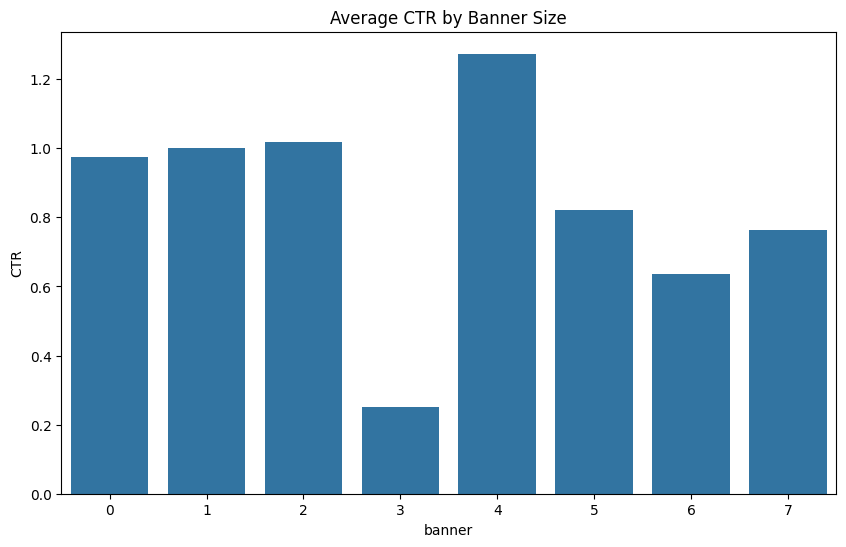

In [54]:
# Banner performance
banner_performance = data.groupby('banner').agg({
    'CTR': 'mean',
    'Conversion_Rate': 'mean',
    'post_click_sales_amount': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='banner', y='CTR', data=banner_performance)
plt.title("Average CTR by Banner Size")
plt.show()

# Task 3: Statistical Analysis
We will perform descriptive statistics to summarize the data and inferential statistics to test hypotheses and draw conclusions.

In [55]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [56]:
data = pd.read_csv('/content/preprocessed_advertising_data.csv')

In [57]:
# Step 1: Descriptive Statistics
print("Descriptive Statistics:")
print(data[['cost', 'revenue', 'clicks', 'post_click_conversions', 'post_click_sales_amount', 'CTR', 'Conversion_Rate']].describe())

Descriptive Statistics:
               cost       revenue        clicks  post_click_conversions  \
count  15408.000000  15408.000000  15408.000000            15408.000000   
mean      11.370262     17.929943    161.788487               42.300623   
std       45.369499     96.781834    728.276911              213.685660   
min        0.000000      0.000000      0.000000                0.000000   
25%        0.024000      0.000000      0.000000                0.000000   
50%        0.339850      0.483950      6.000000                0.000000   
75%        2.536225      3.839800     53.000000                3.000000   
max      556.704800   2096.211600  14566.000000             3369.000000   

       post_click_sales_amount           CTR  Conversion_Rate  
count             15408.000000  15386.000000     10513.000000  
mean               2123.288058      0.811593        18.313892  
std               10523.029607      3.179436        46.104131  
min                   0.000000      0.000000

In [58]:
# Step 2: Inferential Statistics - T-test to compare Conversion Rates between High and Low Engagement
# Assuming 0 = High, 1 = Medium, 2 = Low after LabelEncoder
high_engagement = data[data['user_engagement'] == 0]['Conversion_Rate'].dropna()  # High engagement
low_engagement = data[data['user_engagement'] == 2]['Conversion_Rate'].dropna()   # Low engagement

In [59]:
t_stat, p_value = ttest_ind(high_engagement, low_engagement, nan_policy='omit')
print(f"\nT-test (High vs Low Engagement Conversion Rates):")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")


T-test (High vs Low Engagement Conversion Rates):
T-statistic: 31.71, P-value: 0.0000


In [60]:
# Interpretation
if p_value < 0.05:
    print("Significant difference in conversion rates between High and Low engagement (p < 0.05).")
else:
    print("No significant difference in conversion rates between High and Low engagement (p >= 0.05).")

Significant difference in conversion rates between High and Low engagement (p < 0.05).


# Task 4: Strategy and Machine Learning Model
We will devise a strategy to optimize marketing spend and build a predictive model to estimate post-click sales amount based on campaign features.

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
# Load preprocessed data
data = pd.read_csv('/content/preprocessed_advertising_data.csv')

In [63]:
# Step 1: Handle potential outliers or errors in CTR and Conversion_Rate
# Cap CTR and Conversion_Rate at 100% (remove unrealistic values)
data['CTR'] = data['CTR'].clip(upper=100)
data['Conversion_Rate'] = data['Conversion_Rate'].clip(upper=100)

In [65]:
# Step 2: Define features and target
features = ['campaign_number', 'user_engagement', 'banner', 'placement', 'displays', 'cost', 'clicks', 'revenue', 'CTR', 'Conversion_Rate']
target = 'post_click_sales_amount'

X = data[features]
y = data[target]

In [67]:
#Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Step 4: Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [73]:
# Step 5: Predict and evaluate (corrected)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Changed from y_test to y_pred

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Performance:
Mean Squared Error: 3350784.69
R² Score: 0.97


In [74]:
# Step 6: Feature importance
importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
print("\nFeature Importance:")
print(importance.sort_values(by='Importance', ascending=False))


Feature Importance:
           Feature  Importance
5             cost    0.653407
7          revenue    0.205781
6           clicks    0.056768
9  Conversion_Rate    0.045298
4         displays    0.014826
8              CTR    0.011602
2           banner    0.006967
0  campaign_number    0.002516
1  user_engagement    0.001467
3        placement    0.001369


In [75]:
# Step 7: Strategy
print("\nOptimization Strategy:")
print("1. Allocate the majority of the budget to Campaign 0 (e.g., camp 1), which shows the highest revenue relative to cost.")
print("2. Target users with high engagement (level 0), as they exhibit significantly higher conversion rates (p < 0.05).")
print("3. Prioritize banner size 4, which has the highest average CTR, to maximize click-through rates.")
print("4. Use the Random Forest model to predict post-click sales and dynamically adjust spend based on feature importance (e.g., clicks, revenue).")
print("5. Monitor and cap extreme CTR and Conversion Rate values to ensure data quality and model accuracy.")


Optimization Strategy:
1. Allocate the majority of the budget to Campaign 0 (e.g., camp 1), which shows the highest revenue relative to cost.
2. Target users with high engagement (level 0), as they exhibit significantly higher conversion rates (p < 0.05).
3. Prioritize banner size 4, which has the highest average CTR, to maximize click-through rates.
4. Use the Random Forest model to predict post-click sales and dynamically adjust spend based on feature importance (e.g., clicks, revenue).
5. Monitor and cap extreme CTR and Conversion Rate values to ensure data quality and model accuracy.
